<a href="https://colab.research.google.com/github/changyong93/TIL/blob/main/210711_Tensorflow_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_2%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 구현

## 자동 미분을 이용한 선형 회귀 구현

### 자동 미분

In [1]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행. 임의로 2w^2+5라는 식을 세워보고 w에 대해 미분

In [25]:
w = tf.Variable(2.)
# tensorflow type으로 변수 선언
# tensor(텐서)를 메모리에 저장하는 변수

def f(w):
    y = w**2
    z = 2*y + 5
    return z

이제 gradients를 출력하면 w에 대한 미분한 값이 저장된 것을 확인할 수 있음

In [28]:
# tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록"
# https://www.tensorflow.org/guide/autodiff?hl=ko

with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
# z를 w에 대해 미분을 하는데, 이때 w가 2일 때의 미분 값을 출력
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 선형 회귀 구현하기

In [71]:
# 선형 회귀 모델(Wx+b)를 위한 tf.Variable을 선언합니다
W = tf.Variable(tf.random.normal(shape = [1])) #랜덤으로 초기값 지정
b = tf.Variable(tf.random.normal(shape = [1])) #랜덤으로 초기값 지정
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.091866], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.16852678], dtype=float32)>


#### 가설 정의
---
@tf.function을 추가하면 파이썬 코드가 동일한 텐서플로우 코드로 변경되며, 이렇게 하면 성능을 최적화 할 수 있음  
모든 파이썬 함수에 tf.funciton 데코레이터를 적용 할 필요는 없음.   
모델 훈련의 한 단계(step)나 정방향 연산(forward pass) 같은 고수준 연산에만 tf.function 데코레이터를 적용

---
데코레이션
- http://solarisailab.com/archives/2351 : 텐서플로우 기초 그래프 생성과 실행 설명
- https://www.tensorflow.org/guide/function?hl=ko : (정식 문서)
- https://www.inflearn.com/questions/174459 : tf.functions 역할 설명(인프런)

In [72]:
#여기서 정방향연산은 입력을 넣었을 때 결과를 출력하는 아래 linear_model 함수
@tf.function
def linear_model(x):
    return W*x + b

#### 손실 함수 정의

In [73]:
#손실 함수를 정의
#MSE 손실함수 사용(mean(y - yy)^2)
@tf.function
def mse_loss(y_pred,y): #제곱한 값이므로, y와 y' 위치가 바뀌어도 상관없음
    return tf.reduce_mean(tf.square(y_pred - y)) #tf.reduce_mean = 평균을 출력해주는 메소드

#### 옵티마이저 정의(경사 하강법)

파라미터를 업데이트 하는 한 순간을 step이라고 할 때, 그 한 순간을  정의한 함수를 train_step이라는 이름의 함수로 작성   
아래 내용은 이해가 안되면 일단 처음에는 암기를 해도 무방할 만큼, TF2.0에서는 당연하게 사용되는 패턴   
앞으로의 강의에서는 이보다도 더 쉬운 keras 패턴을 사용할 예정

In [74]:
# 최적화를 위한 그라디언트 디센트 옵티마이저 정의
# 사용자가 정한 learning rate 값을 sgd()에 작성
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 첫 번째 인자인 x는 입력 데이터
# 두 번째 인자인 y는 레이블
@tf.function
def train_step(x,y):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = linear_model(x)
    
    #MSE 계산
    loss = mse_loss(y_pred,y)

  #손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(loss,[W,b]) #loss를 W와 b에 대해서 미분

  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W,b])) #미분한 값을 기준으로 W,b를 업데이트

In [75]:
# 트레이닝을 위한 입력값과 출력값 준비
x_train = [1,2,3,4]
y_train = [2,4,6,8]

# 경사하강법을 1000번 수행
for i in range(1000):
  if (i+1) % 100 == 0:
    print(i+1, "회 학습")
  train_step(x_train,y_train)

# 테스트를 위한 입력값을 준비
x_test = [3.5, 5, 5.5, 6]
# 테스트 데이터를 이요해 학습된 선형회귀 모델이 데이터의 경향성(y = 2x)을 잘 학습했는지 측정

# 예상되는 참값 : [7, 10, 11, 12]
# print(linear_model(x_test))
print(linear_model(x_test).numpy())

100 회 학습
200 회 학습
300 회 학습
400 회 학습
500 회 학습
600 회 학습
700 회 학습
800 회 학습
900 회 학습
1000 회 학습
[ 6.9896154  9.961792  10.9525175 11.943244 ]


## 케라스를 이용한 선형 회귀 구현

In [91]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

keras 모델을 만드는 방법은 sequential 방법과 functional API 방법이 있다(https://leestation.tistory.com/777, https://subinium.github.io/Keras-7/)
- Sequential : 층층이(layer-by-layer) 쌓아 올릴 수 있게 하는 방법
  - 대부분의 문제를 해결할 수 있지만, layer를 공유하는 구조나, 다중 입력/출력을 사용하지 못하는 문제가 있다
- functional API : layer가 앞/뒤 layer에만 연결된 구조뿐 아니라 훨씬 더 자유자재로 그 구조를 정의하여 사용 가능
  - layer들을 어떤 layer에든지 연결하여 사용 가능
---
- 첫 번째 인자인 1은 출력 차원을 정의
- 두 번째 인자인 input_dim은 입력 차원을 정의
- 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가짐

In [102]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

#방식 1-1)
model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
#1-1)
model.add(Dense(units = 1, input_dim = 1, activation = 'linear'))
#1-2)
# model.add(Dense(units = 1, input_shape = (1,), activation = 'linear'))

#방식 2)
# model = Sequential(
#     [
#      Dense(units = 1, input_dim = 1,activation = 'linear')
#     ]
# )

# sgd는 경하 하강법을 의미. 학습률(learning rate,lr)은 0.01
sgd = optimizers.SGD(lr=0.01)


# 손실 함수(Loss function)은 평균제곱오차 mse를 사용
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

model.fit(X,y, batch_size = 1, epochs = 300, shuffle = False)
#shuffle은 batch_size 단위로 섞음
#shuffle을 안할 시 입력 데이터 순서까지 학습할 수 있음
#일반적으로 데이터 순서가 무의미 하기에 셔플을 적용하지만 수업에선 셔플 옵션이 있다는 것을 보여주기 위해 False를 함

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 308.0792 - mse: 308.0792
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1537 - mse: 2.1537
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1534 - mse: 2.1534
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1532 - mse: 2.1532
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1530 - mse: 2.1530
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1527 - mse: 2.1527
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1525 - mse: 2.1525
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1523 - mse: 2.1523
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1521 - mse: 2.1521
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1519 - mse: 2.1519
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1

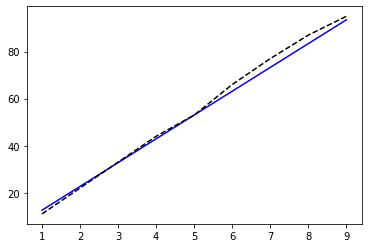

In [121]:
import matplotlib.pyplot as plt
plt.plot(X,model.predict(X),'b',X,y,'k--')